In [1]:
#!conda list
import pandas as pd
import matplotlib
import numpy as np

# Data preprocessing

In [2]:
df_data = pd.read_csv('data/artists-data.csv')
df_lyrics = pd.read_csv('data/lyrics-data.csv')

In [3]:
df_data.head(10)

,Artist,Songs,Popularity,Link,Genre,Genres
0,10000 Maniacs,110,0.3,/10000-maniacs/,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
1,12 Stones,75,0.3,/12-stones/,Rock,Rock; Gospel/Religioso; Hard Rock; Grunge; Roc...
2,311,196,0.5,/311/,Rock,Rock; Surf Music; Reggae; Ska; Pop/Rock; Rock ...
3,4 Non Blondes,15,7.5,/4-non-blondes/,Rock,Rock; Pop/Rock; Rock Alternativo; Grunge; Blue...
4,A Cruz Está Vazia,13,0.0,/a-cruz-esta-vazia/,Rock,Rock
5,Aborto Elétrico,36,0.1,/aborto-eletrico/,Rock,Rock; Punk Rock; Pós-Punk; Post-Rock
6,Abril,36,0.1,/abril/,Rock,Rock; Emocore; Hardcore; Pop/Rock; Rock Altern...
7,Abuse,13,0.0,/abuse/,Rock,Rock; Hardcore
8,AC/DC,192,10.8,/ac-dc/,Rock,Rock; Heavy Metal; Classic Rock; Hard Rock; Cl...
9,ACEIA,0,0.0,/aceia/,Rock,Rock


In [4]:
df_lyrics


,ALink,SName,SLink,Lyric,Idiom
0,/10000-maniacs/,More Than This,/10000-maniacs/more-than-this.html,I could feel at the time. There was no way of ...,ENGLISH
1,/10000-maniacs/,Because The Night,/10000-maniacs/because-the-night.html,"Take me now, baby, here as I am. Hold me close...",ENGLISH
2,/10000-maniacs/,These Are Days,/10000-maniacs/these-are-days.html,These are. These are days you'll remember. Nev...,ENGLISH
3,/10000-maniacs/,A Campfire Song,/10000-maniacs/a-campfire-song.html,"A lie to say, ""O my mountain has coal veins an...",ENGLISH
4,/10000-maniacs/,Everyday Is Like Sunday,/10000-maniacs/everyday-is-like-sunday.html,Trudging slowly over wet sand. Back to the ben...,ENGLISH
...,...,...,...,...,...
209517,/zeca-pagodinho/,Vou Botar Teu Nome Na Macumba,/zeca-pagodinho/vou-botar-teu-nome-na-macumba....,Eu vou botar teu nome na macumba. Vou procurar...,PORTUGUESE
209518,/zeca-pagodinho/,Vou Procurar Esquecer,/zeca-pagodinho/vou-procurar-esquecer.html,Vou procurar um novo amor na minha vida. Porqu...,PORTUGUESE
209519,/zeca-pagodinho/,Vou Ver Juliana,/zeca-pagodinho/vou-ver-juliana.html,Quando a mare vazá. Vou vê juliana. Vou vê jul...,PORTUGUESE
209520,/zeca-pagodinho/,Yaô Cadê A Samba / Outro Recado / Hino,/zeca-pagodinho/yao-cade-a-samba-outro-recado-...,"Ô Yaô. Yaô, cadê a samba?. Está mangando na cu...",PORTUGUESE


## Initial data analysis

In [5]:
df_data['Genre'].unique()

array(['Rock', 'Pop', 'Hip Hop', 'Samba', 'Funk Carioca', 'Sertanejo'],
      dtype=object)

<AxesSubplot:>

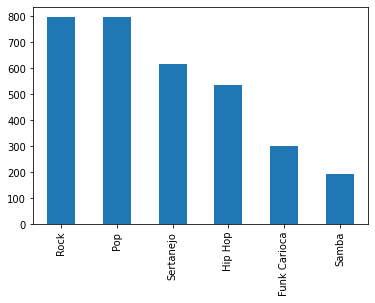

In [6]:
df_data['Genre'].value_counts().plot.bar()

Main languages are: 1. English, 2. Portugese, 3. Spanish

<AxesSubplot:>

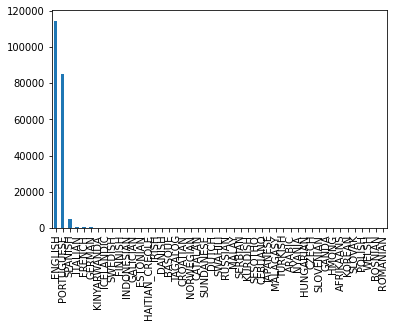

In [7]:
df_lyrics['Idiom'].value_counts().plot.bar()

In [8]:
df_lyrics.isnull().sum()

ALink       0
SName       0
SLink       0
Lyric      38
Idiom    3147
dtype: int64

### Dropping all rows with languange ≠ English
also dropping null rows per default

In [9]:
df_lyrics = df_lyrics[df_lyrics.Idiom == 'ENGLISH']


In [10]:
df_lyrics.isnull().sum()

ALink    0
SName    0
SLink    0
Lyric    0
Idiom    0
dtype: int64

### Removing rows of bands with ambiguous genres
Fixing the lyrics dataframe to include Genre & Artist

In [11]:
for row in df_data.itertuples():
    if len(df_data.loc[df_data['Link']==row.Link]) > 1:
        df_lyrics = df_lyrics.drop(df_lyrics[df_lyrics['ALink'] == row.Link].index)


In [12]:

genres = []
artists =[]
missing_artists = []
for row in df_lyrics.itertuples():
    if df_data.loc[df_data['Link']==row.ALink, 'Genre'].empty:
        missing_artists.append(row.Index)
    else:
        genres.append(df_data.loc[df_data['Link']==row.ALink, 'Genre'].item())
        artists.append(df_data.loc[row.ALink==df_data['Link'], 'Artist'].item())

df_lyrics = df_lyrics.drop(missing_artists)
df_lyrics['Genre'] = genres
df_lyrics['Artist'] = artists
df_lyrics = df_lyrics.reset_index(drop=True)



In [13]:
df_lyrics = df_lyrics.drop(['ALink', 'SLink', 'Idiom'], axis=1)
df_lyrics['lyric_length'] = df_lyrics['Lyric'].apply(lambda x: len(x.split()))

In [14]:
df_lyrics

,SName,Lyric,Genre,Artist,lyric_length
0,World So Cold,"It starts with pain, followed by hate. Fueled ...",Rock,12 Stones,332
1,Broken,Freedom!. Alone again again alone. Patiently w...,Rock,12 Stones,248
2,3 Leaf Loser,"Biting the hand that feeds you, lying to the v...",Rock,12 Stones,142
3,Anthem For The Underdog,You say you know just who I am. But you can't ...,Rock,12 Stones,156
4,Adrenaline,My heart is beating faster can't control these...,Rock,12 Stones,337
...,...,...,...,...,...
94880,Sign of the Times (Harry Styles cover),Just stop your crying. It's a sign of the time...,Samba,Nayara Portela,358
94881,Stay (Rihanna cover),All along it was a fever. A cold sweat hot-hea...,Samba,Nayara Portela,244
94882,When I Was Your Man (Bruno Mars cover),"Same bed, but it feels just a little bit bigge...",Samba,Nayara Portela,310
94883,Don't,"Don't, don't, that's what you say. Each time t...",Samba,Seu Jorge,112


In [15]:
df_lyrics['Genre'].value_counts()
dropGenres = ['Sertanejo', 'Samba', 'Funk Carioca']

df_lyrics = df_lyrics[~df_lyrics.Genre.isin(dropGenres)]


In [16]:
df_lyrics['Genre'].value_counts()


Rock       53208
Pop        26810
Hip Hop    14796
Name: Genre, dtype: int64

In [17]:
df = df_lyrics.groupby('Genre', group_keys=False).apply(lambda s: s.sample(df_lyrics['Genre'].value_counts().min())) #


In [18]:
df.to_csv('unprocessed_lyrics.csv', index=False)


In [19]:
df

,SName,Lyric,Genre,Artist,lyric_length
60426,W.A.Y.S,At forty-four minutes to four. An angel walked...,Hip Hop,Jhene Aiko,361
68012,Two Wrongs,Intro:. (Wyclef). I'm just sittin' here playin...,Hip Hop,Wyclef Jean,550
62047,Triumphant (Get 'em),"Get 'em, get 'em, get 'em. Hit 'em, hit 'em, h...",Hip Hop,Meek Mill,599
59585,St. Tropez,Roll up and smoke my sins away. I'd like to go...,Hip Hop,J. Cole,259
53857,G-Unit Soldiers,"f/ Lloyd Banks, Tony Yayo (G-Unit). [Tony Yayo...",Hip Hop,50 Cent,528
...,...,...,...,...,...
41477,Rock This Town,Well my baby and me went out late Saturday nig...,Rock,Stray Cats,323
48044,On The Other Side,I'm tired of everyone I know. Of everyone I se...,Rock,The Strokes,176
13204,Kentucky Rain,Seven lonely days. And a dozen towns ago. I re...,Rock,Elvis Presley,187
15917,Stranger Things Have Happened,Goddamn this dusty room. This hazy afternoon. ...,Rock,Foo Fighters,243


In [4]:
import pandas as pd
df = pd.read_csv('unprocessed_lyrics.csv')


In [5]:
df

,SName,Lyric,Genre,Artist,lyric_length
0,W.A.Y.S,At forty-four minutes to four. An angel walked...,Hip Hop,Jhene Aiko,361
1,Two Wrongs,Intro:. (Wyclef). I'm just sittin' here playin...,Hip Hop,Wyclef Jean,550
2,Triumphant (Get 'em),"Get 'em, get 'em, get 'em. Hit 'em, hit 'em, h...",Hip Hop,Meek Mill,599
3,St. Tropez,Roll up and smoke my sins away. I'd like to go...,Hip Hop,J. Cole,259
4,G-Unit Soldiers,"f/ Lloyd Banks, Tony Yayo (G-Unit). [Tony Yayo...",Hip Hop,50 Cent,528
...,...,...,...,...,...
44383,Rock This Town,Well my baby and me went out late Saturday nig...,Rock,Stray Cats,323
44384,On The Other Side,I'm tired of everyone I know. Of everyone I se...,Rock,The Strokes,176
44385,Kentucky Rain,Seven lonely days. And a dozen towns ago. I re...,Rock,Elvis Presley,187
44386,Stranger Things Have Happened,Goddamn this dusty room. This hazy afternoon. ...,Rock,Foo Fighters,243


In [6]:
import spacy 

nlp = spacy.load('en_core_web_lg')


Might want to add some slang converter here. HipHop genre has a lot of slang

In [7]:

def preprocess(text):    

    doc = nlp(text)
    
    noGoTag = ['LS', 'XX', '.', ',', '-', '.', ':']
    doc_no_sw = [token for token in doc if not token.is_stop]


    doc_no_sw = [token.lemma_ for token in doc_no_sw if not token.tag_ in noGoTag] 
    doc_no_sw = [' '.join(word for word in doc_no_sw)]
    doc_no_sw = doc_no_sw[0]
    doc = nlp(doc_no_sw)
    doc_no_sw = [token.lemma_ for token in doc if not token.is_stop]
    doc_final = [' '.join(word for word in doc_no_sw if word.isalpha())]
    #print(doc_final)
    return doc_final[0]

In [8]:
preprocess(df.loc[1,'Lyric'])

'intro Wyclef sittin playin guitar claudette City High Claudette Clef verse Wyclef excuse screamin deep mind dreamin wake girl feel like half long alive shorty walk door boopy listen soong claudette chance chance devil long dance faithful fruitful build family follow God destiny run block papi listen song wyclef ooh walk door listen chorus wyclef claudette wrong right right wrong tryin fight tryin dinner candlelight lie bed love night papi leave baby stay promise girl love like love touch like touch girl chance girl go verse claudette baby understand forgive go forget bring wyclef baby baby baby baby grow thug man build castle brick long sand claudette run block baby listen song wyclef ooh walk door listen chorus wyclef claudette wrong right right wrong tryin fight tryin dinner candlelight lie bed love night papi leave baby stay promise girl love like love touch like touch girl chance girl go Bridge Claudette pain sunshine pain car sickness feel like cure wyclef key soul let go love ye

In [9]:
#df = df.groupby('Genre', group_keys=False).apply(lambda s: s.sample(333, random_state=42)) #


In [10]:
df['Lyric'] = df['Lyric'].apply(lambda x: preprocess(x))

In [11]:
df['lyric_length_processed'] = df['Lyric'].apply(lambda x: len(x.split()))

In [12]:
df=df.drop(['lyric_length'],axis=1)

In [13]:
df

,SName,Lyric,Genre,Artist,lyric_length_processed
0,W.A.Y.S,minute angel walk door open window soul tell t...,Hip Hop,Jhene Aiko,110
1,Two Wrongs,intro Wyclef sittin playin guitar claudette Ci...,Hip Hop,Wyclef Jean,218
2,Triumphant (Get 'em),hit hit hit hit hit hit hit hit hit tell swear...,Hip Hop,Meek Mill,217
3,St. Tropez,roll smoke sin away like Tropez maybe maybe st...,Hip Hop,J. Cole,77
4,G-Unit Soldiers,Lloyd Banks Tony Yayo G unit Tony Yayo yea Llo...,Hip Hop,50 Cent,319
...,...,...,...,...,...
44383,Rock This Town,baby late Saturday night hair pile high baby l...,Rock,Stray Cats,169
44384,On The Other Side,tired know street tv yeah wait hate hate hate ...,Rock,The Strokes,36
44385,Kentucky Rain,seven lonely day dozen town ago reach night kn...,Rock,Elvis Presley,74
44386,Stranger Things Have Happened,goddamn dusty room hazy afternoon breathe sile...,Rock,Foo Fighters,108


In [14]:
df.to_csv('preprocessed_lyrics.csv', index=False)
